**All ALGORITHMS**
<br>
1. KNN classifier <br>
2. Naive Bayes <br>
3. K means <br>
4. Hierarchial <br>
5. Decision Tree <br>
6. Linear regression <br>
7. Logistic regression <br>
8. MLP <br>


**DATA SET DESCRIPTION**<br>
This dataset is taken from the data-world repository and is official data published by the givernment of UK. <br>

Information on all road accident casualties across Calderdale. Data includes location, number of people and vehicles involved, road surface, weather conditions and severity of any casualties. Please note 'The Eastings and Northings' are generated at the roadside where the accident occurred. <br> The road casualty pdf reports refer to casualties who were killed or seriously injured, whereas the accident data refers to all road casualties.

Here we have considered 'Casualty Severity' as class attribute and we are trying to classify the dataset into 3 clasess based on the weather conditions, lightning age of the casualty etc. we are not considering the eastings and northings for time being. 

In [ ]:
from google.colab import files
 
uploaded = files.upload()

Saving accident-2014-4.csv to accident-2014-4.csv


In [ ]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

df = pd.read_csv(io.BytesIO(uploaded['accident-2014-4.csv']))
print(df.head().to_markdown())

|    | Reference Number   |   Grid Ref: Easting |   Grid Ref: Northing |   Number of Vehicles | Accident Date   |   Time (24hr) |   1st Road Class | 1st Road Class & No   |   Road Surface |   Lighting Conditions |   Weather Conditions | Local Authority   |   Casualty Class |   Casualty Severity |   Sex of Casualty |   Age of Casualty |   Vehicle Number |   Type of Vehicle |
|---:|:-------------------|--------------------:|---------------------:|---------------------:|:----------------|--------------:|-----------------:|:----------------------|---------------:|----------------------:|---------------------:|:------------------|-----------------:|--------------------:|------------------:|------------------:|-----------------:|------------------:|
|  0 | 11S0281            |              407491 |               428929 |                    1 | 28-01-2014      |           835 |                6 | U                     |              2 |                     1 |                    9 | Calderdal

Index(['Number of Vehicles', 'Road Surface', 'Lighting Conditions',
       'Weather Conditions', 'Sex of Casualty', 'Age of Casualty',
       'Type of Vehicle', 'Casualty Severity'],
      dtype='object')

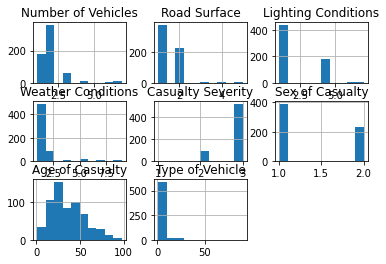

In [ ]:
#Drop the columns with the non numerical values.
df1 = df
num_df =df1.drop(['Grid Ref: Easting', 'Grid Ref: Northing','Reference Number','Accident Date','Time (24hr)', '1st Road Class','Casualty Class', '1st Road Class & No','Vehicle Number','Local Authority'], axis=1)
num_df.columns
num_df.hist()

# Bring the class attribute as the last column
# The casulaty Severity here has 3 values.. 1.Fatal, 2.Seriuos . 3.Slight

temp_series = num_df.pop('Casualty Severity')
num_df['Casualty Severity'] = temp_series
num_df.columns

We have plotted the histograms for all the relevant independent features along with the dependant feature.<br>
This can be used to see the quantities or number of items for each feature.
<br> example - in Casualty severity histogram, we can understand that most records belong to 'class 3'. and hence using this dataset might help us to detremine the class 3

In [ ]:
# importing the sklearn library
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# getting the x(dataset excluding the class attribute) and y(class attribute) dataset from class data set
x = num_df.drop('Casualty Severity',axis=1)
y = num_df['Casualty Severity']

X_train, X_test, y_train, y_test= train_test_split(x, y, test_size= 0.25)

In [ ]:
classiferList = ["KNN", "Naive bayes", "K means", "Hierarchial", "Decision Tree", "Linear Regression", "Logistic regression", "MLP"]
accuracyList = []

acc_dict = {'KNN':0, "Naive bayes":0, "Kmeans":0, "Hierarchial":0, "DecisionTree":0, "LinearRegression":0, "LogisticRegression":0, "MLP":0}

**1. KNN CLASSIFIER**
<br>
K-NN algorithm can be used for Classification as well as for Regression.
It is used for Supervised Learning.
It classifies the data point on how its neighbor is classified

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5,p=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
acc_score = accuracy_score(y_pred,y_test) 
print("Accuracy score",acc_score)
acc_dict['KNN']=round(acc_score,3)
print(acc_dict)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.25      0.10      0.14        20
           3       0.87      0.95      0.91       135

    accuracy                           0.83       156
   macro avg       0.37      0.35      0.35       156
weighted avg       0.79      0.83      0.80       156

[[  0   0   1]
 [  0   2  18]
 [  1   6 128]]
Accuracy score 0.8333333333333334
{'KNN': 0.833, 'Naive bayes': 0, 'Kmeans': 0, 'Hierarchial': 0, 'DecisionTree': 0, 'LinearRegression': 0, 'LogisticRegression': 0, 'MLP': 0}


**2.Naive Bayes Classifier**
<br>
It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
acc_score = accuracy_score(y_pred,y_test) 
print("Accuracy score",acc_score)
acc_dict["Naive bayes"] = acc_score

              precision    recall  f1-score   support

           1       0.04      1.00      0.08         1
           2       0.29      0.25      0.27        20
           3       0.92      0.79      0.85       135

    accuracy                           0.72       156
   macro avg       0.42      0.68      0.40       156
weighted avg       0.84      0.72      0.77       156

[[  1   0   0]
 [  6   5   9]
 [ 16  12 107]]
Accuracy score 0.7243589743589743


**3. K Means**
<br>
K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0) 

kmeans.fit(x)
y_pred = kmeans.predict(x)

kmeans.cluster_centers_
kmeans.inertia_

labels = kmeans.labels_
correct_labels = sum(y == labels)
acc_score = correct_labels/float(y.size)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(acc_score))
acc_dict["Kmeans"] = acc_score

Result: 34 out of 623 samples were correctly labeled.
Accuracy score: 0.05


[256540.7287319424, 96536.0727394277, 59218.90311808844, 45475.39431129023, 32436.48782279786, 24106.34916567345, 19888.738973885575, 17086.648659106406, 15788.31109408478, 14588.000247425607]


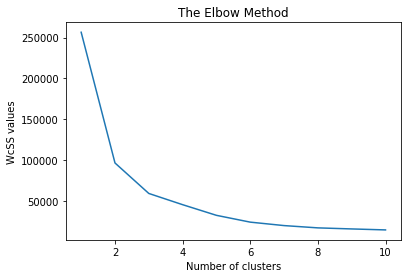

In [ ]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
print(cs)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WcSS values')
plt.show()

We have used lineplot to depict the best clusters by setting different number of cluster to the naive bayes classifier, hence finding the optimal clusters using the WCSS value obtained during each classification. <br>
From this graph we can infer that the optimal cluster value is 4 as the slope becomes normal

**4.Hierarchial classification**
<br>
Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis 

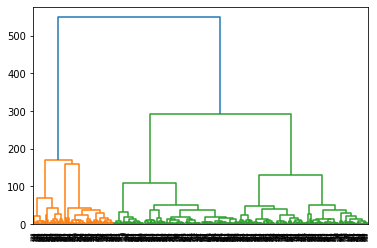

In [ ]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(x, method= 'ward', metric= 'euclidean'))

We can clearly visualize the steps of hierarchical clustering. More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

Now, we can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line). Let’s set this threshold as 4 and draw a horizontal line:

In [ ]:
from sklearn.cluster import AgglomerativeClustering
D_cluster = AgglomerativeClustering(n_clusters = 3)

X_D = D_cluster.fit(x)
Y_pred_D = D_cluster.fit_predict(x)
acc_score = accuracy_score(y,Y_pred_D)
acc_dict["Hierarchial"] = acc_score

**5. Decision Tree**
<br>
It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

print(classification_report(y_test, y_pred_gini))
print(confusion_matrix(y_test,y_pred_gini))
acc_score = accuracy_score(y_pred_gini,y_test) 
print("Accuracy score",acc_score)
acc_dict['DecisionTree']=round(acc_score,3)
print(acc_dict)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.42      0.25      0.31        20
           3       0.89      0.95      0.92       135

    accuracy                           0.85       156
   macro avg       0.44      0.40      0.41       156
weighted avg       0.82      0.85      0.83       156

[[  0   0   1]
 [  0   5  15]
 [  0   7 128]]
Accuracy score 0.8525641025641025
{'KNN': 0.833, 'Naive bayes': 0.7243589743589743, 'Kmeans': 0.05457463884430177, 'Hierarchial': 0.05457463884430177, 'DecisionTree': 0.853, 'LinearRegression': 0, 'LogisticRegression': 0, 'MLP': 0}


**6. Linear Regression**
It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables

In [ ]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
pred = lm.predict(X_train)

#checking accuracy:
from sklearn.metrics import r2_score
predd = lm.predict(X_test)
acc_score = r2_score(y_test, predd)
acc_dict['LinearRegression']=round(acc_score,3)
print(acc_dict)

{'KNN': 0.833, 'Naive bayes': 0.7243589743589743, 'Kmeans': 0.05457463884430177, 'Hierarchial': 0.05457463884430177, 'DecisionTree': 0.853, 'LinearRegression': 0.052, 'LogisticRegression': 0, 'MLP': 0}


In [ ]:
num_df.columns

Index(['Number of Vehicles', 'Road Surface', 'Lighting Conditions',
       'Weather Conditions', 'Sex of Casualty', 'Age of Casualty',
       'Type of Vehicle', 'Casualty Severity'],
      dtype='object')

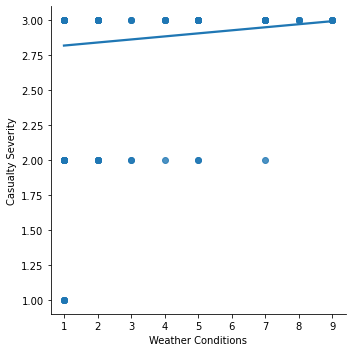

In [ ]:
sns.lmplot(x ="Weather Conditions", y ="Casualty Severity", data = num_df, order = 1, ci = None,)

we can see that linear regression doesn't work for classification. as the line is not able clarly divide the dataset

**7. Logistic regression**
<br>
Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0,multi_class='ovr')  
classifier.fit(X_train, y_train)  
y_pred= classifier.predict(X_test)  

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
acc_score = accuracy_score(y_test, y_pred) 
print("Accuracy score",acc_score)
acc_dict['LogisticRegression']=round(acc_score,3)
print(acc_dict)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.67      0.10      0.17        20
           3       0.88      0.99      0.93       135

    accuracy                           0.87       156
   macro avg       0.51      0.36      0.37       156
weighted avg       0.84      0.87      0.83       156

[[  0   0   1]
 [  0   2  18]
 [  0   1 134]]
Accuracy score 0.8717948717948718
{'KNN': 0.833, 'Naive bayes': 0.7243589743589743, 'Kmeans': 0.05457463884430177, 'Hierarchial': 0.05457463884430177, 'DecisionTree': 0.853, 'LinearRegression': 0.052, 'LogisticRegression': 0.872, 'MLP': 0}


**8. Multi Layer Perceptron - MLP**
<br>
A multilayer perceptron (MLP) is a feed forward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input nodes connected as a directed graph between the input and output layers. 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score

clf = MLPClassifier(hidden_layer_sizes=(5,),random_state=1, max_iter=300).fit(X_train, y_train)
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_test)
print('Overall AUC:', roc_auc_score(y_train, clf.predict_proba(X_train),multi_class="ovr"))


y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
acc_score = accuracy_score(y_test, y_pred) 
print("Accuracy score",acc_score)
acc_dict['MLP']=round(acc_score,3)
print(acc_dict)

Overall AUC: 0.6436007783584715
[[  0   0   1]
 [  0   3  17]
 [  0   8 127]]
Accuracy score 0.8333333333333334
{'KNN': 0.833, 'Naive bayes': 0.7243589743589743, 'Kmeans': 0.05457463884430177, 'Hierarchial': 0.05457463884430177, 'DecisionTree': 0.853, 'LinearRegression': 0.052, 'LogisticRegression': 0.872, 'MLP': 0.833}


**Plotting the prediction accuracies of all the algorithms for test data set**

Text(0, 0.5, 'Accuracy scores')

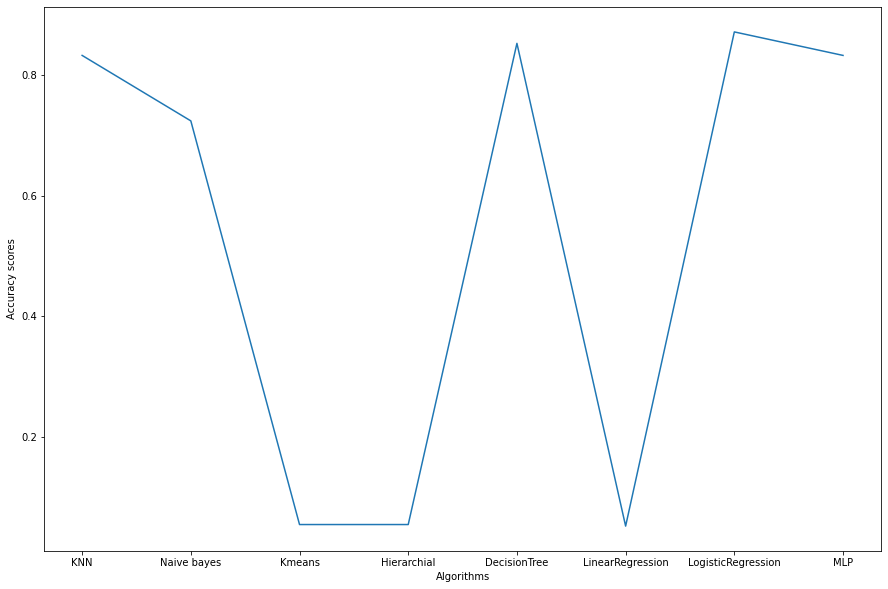

In [ ]:
keyList = []
valuesList = []

for key, value in acc_dict.items():
  keyList.append(key)
  valuesList.append(value)

plt.figure(figsize=(15, 10))
plt.plot(keyList, valuesList)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy scores")


**We can see the accuracies for the given algorithms**
<br>
classification algos seem to have beter accuracies than clustering.
<br> 
Linear regression also provides least accuracy as the dataset doesnt contain continuous data. hence the problem is a classification problem